In [31]:
import json
path = 'arc-agi_training_challenges.json'
with open (path) as my_json_file:
    a = json.load(my_json_file)


def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [32]:
training_challenges   = load_json('arc-agi_training_challenges.json')
training_solutions    = load_json('arc-agi_training_solutions.json')

evaluation_challenges = load_json('arc-agi_evaluation_challenges.json')
evaluation_solutions  = load_json('arc-agi_evaluation_solutions.json')

test_challenges       = load_json('arc-agi_test_challenges.json')

In [33]:
import pandas as pd
p = pd.DataFrame(training_challenges)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib import colors
import copy # for creating full copy of JSON object

In [35]:
cmap = colors.ListedColormap(
   ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
    '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25', '#FFFFFF'])
norm = colors.Normalize(vmin=0, vmax=10)

In [36]:
def plot_one(ax, i, task, train_or_test, input_or_output):
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)
    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
    ax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    ax.set_title(train_or_test + ' ' + input_or_output)
   
def plot_task(task1, text):    
    num_train = len(task1['train'])
    
    w=num_train
    fig, axs  = plt.subplots(2, w, figsize=(3*w ,3*2))
    plt.suptitle(f'{text}:', fontsize=20, fontweight='bold', y=1)

    for j in range(num_train):     
        plot_one(axs[0, j], j,task1,'train', 'input')
        plot_one(axs[1, j], j,task1,'train', 'output')  
    
    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('black') 
    fig.patch.set_facecolor('#dddddd')
    plt.tight_layout()

    plt.show()

In [39]:
N = 400 # number of tasks in "training_challenges"
MARC = copy.deepcopy(training_challenges)
for i in range(N): 
    t = list(training_challenges)[i]  # List of names of tasks    
    task = training_challenges[t]                      
    for m in ['train']:
        l = len(task[m])
        for j in range(l): # iterating instances
            for k in ['input', 'output']:
                s=np.shape(task[m][j][k])
                for w in range(s[0]):
                    for h in range(s[1]):
                        temp = task[m][j][k][w][h]
                        MARC[t][m][j][k][w][h] = 0 if temp==0 else 10

MARC1 = copy.deepcopy(training_solutions)
for i in range(N): 
    t = list(training_solutions)[i]  # List of names of tasks    
    task = training_solutions[t]                      
    for m in ['train']:
        l = len(task[m[0]])
        for j in range(l): # iterating instances
            for k in ['input', 'output']:
                s=np.shape(task[m[0]][j][k])
                for w in range(s[0]):
                    for h in range(s[1]):
                        temp = task[m[0]][j][k][w][h]
                        MARC1[t][m][j][k][w][h] = 0 if temp==0 else 10

TypeError: list indices must be integers or slices, not str

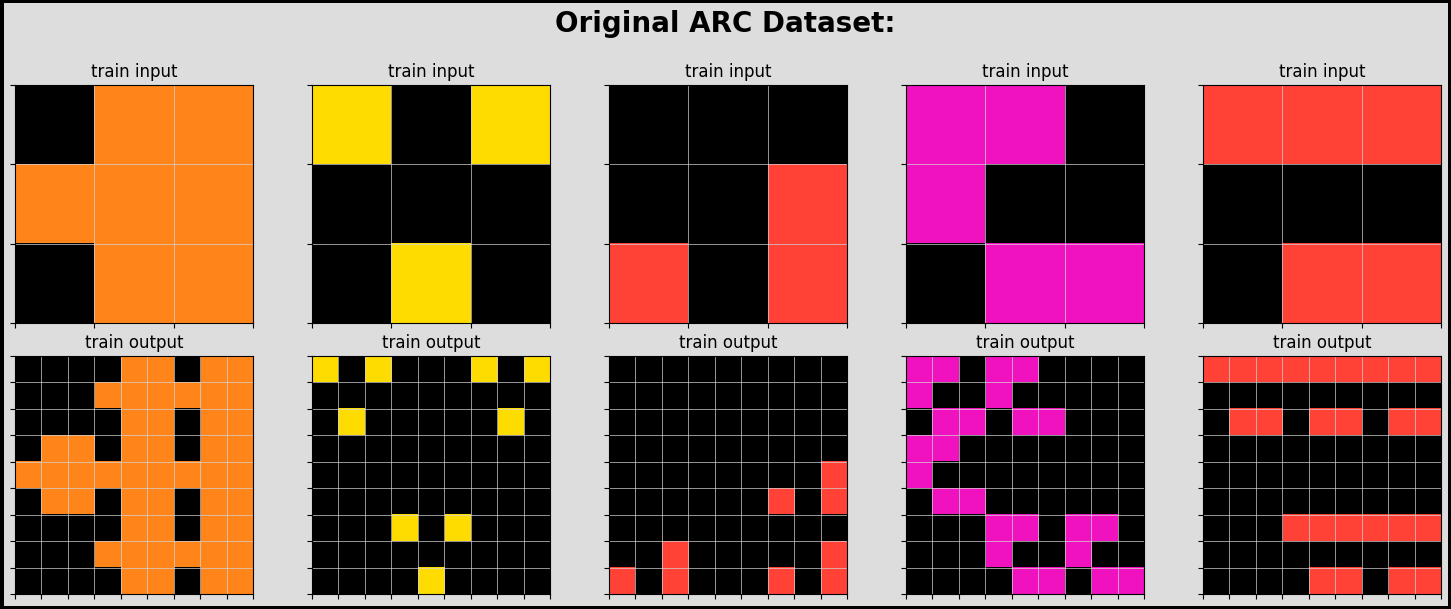

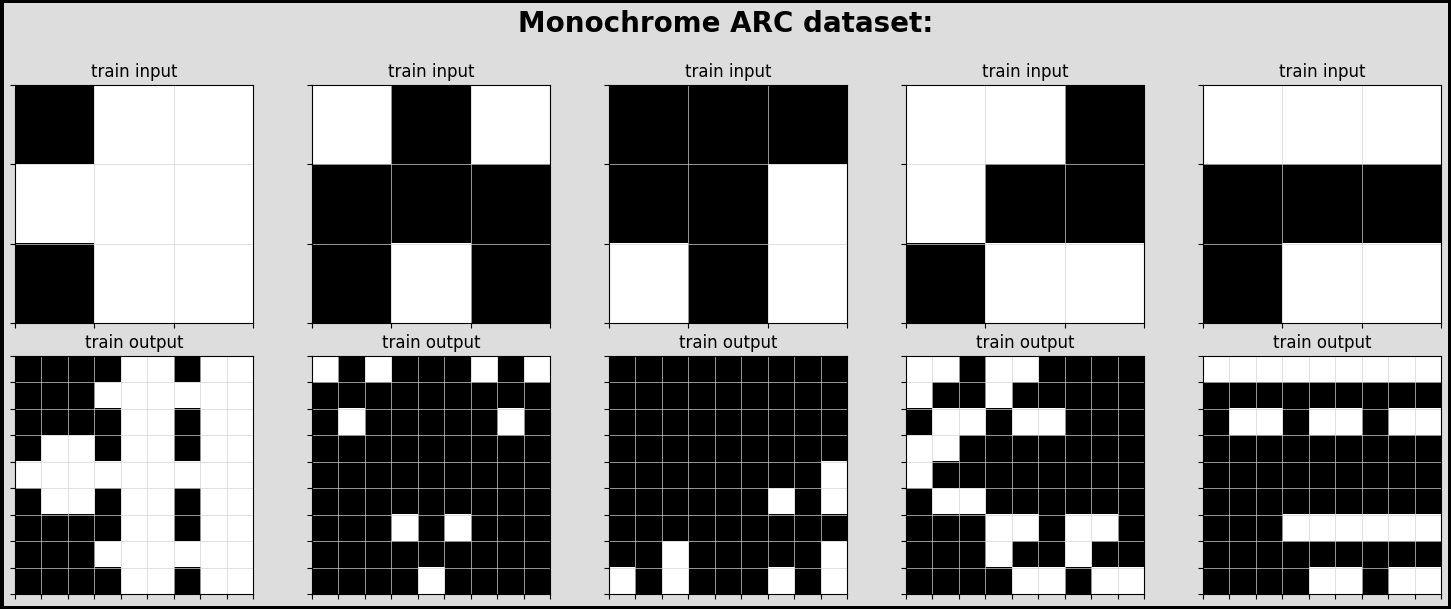

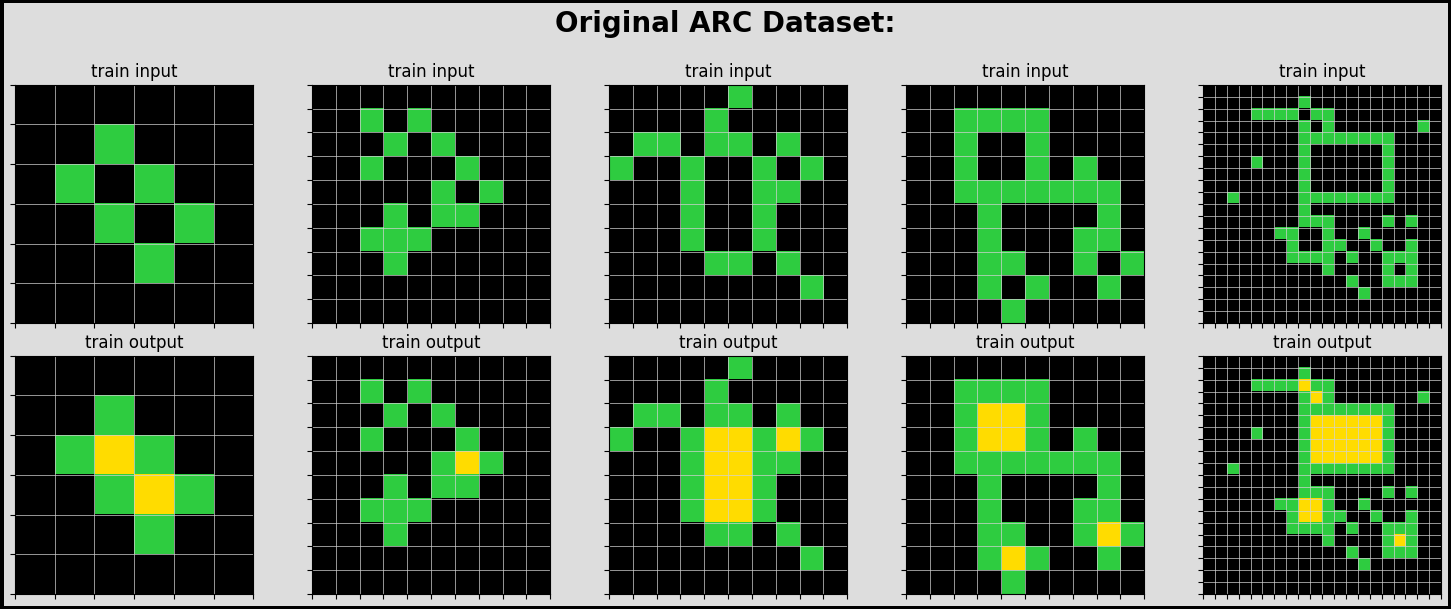

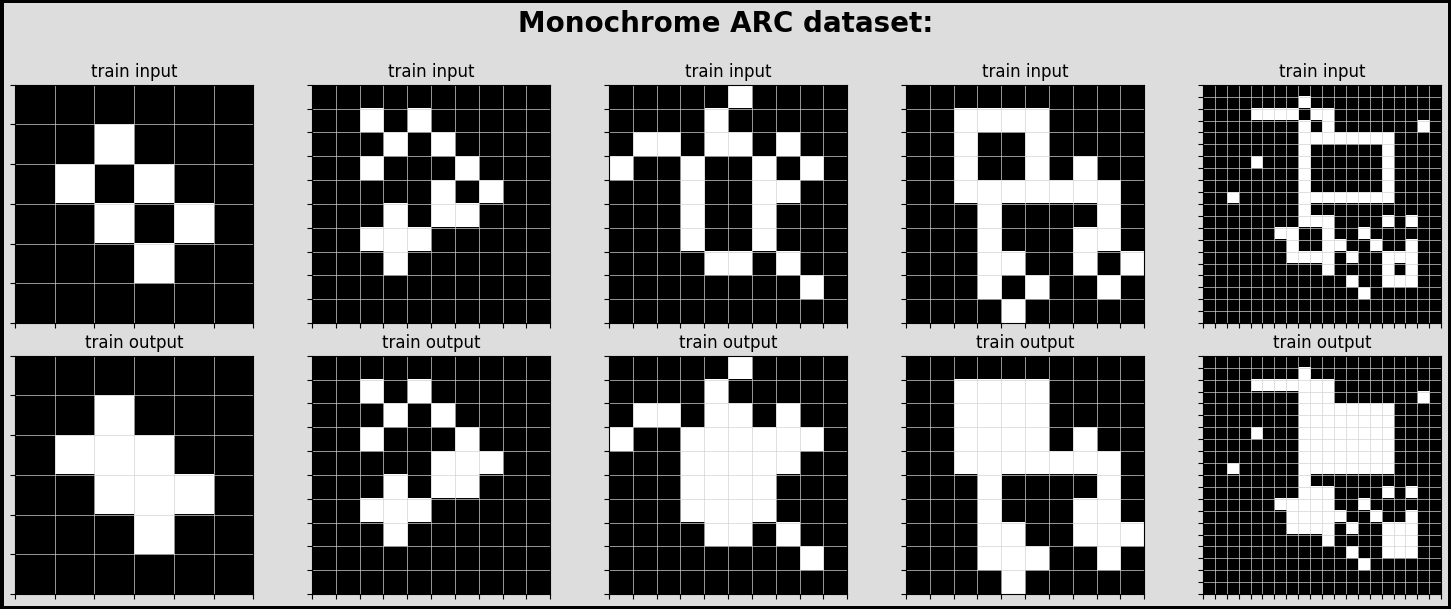

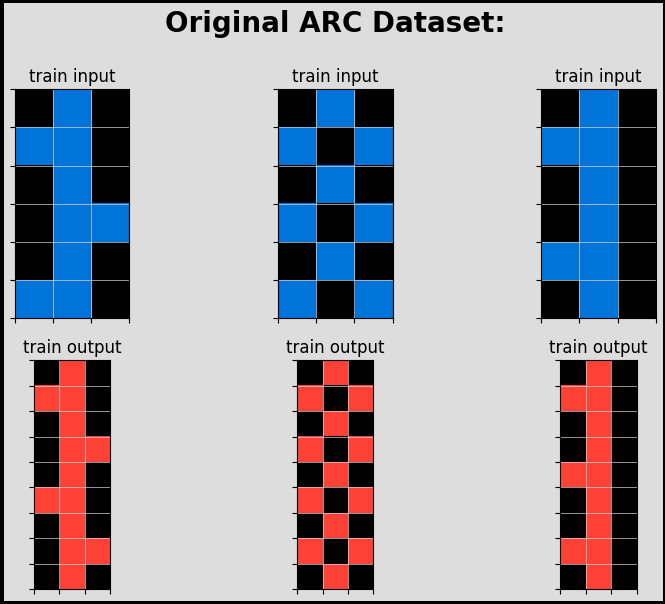

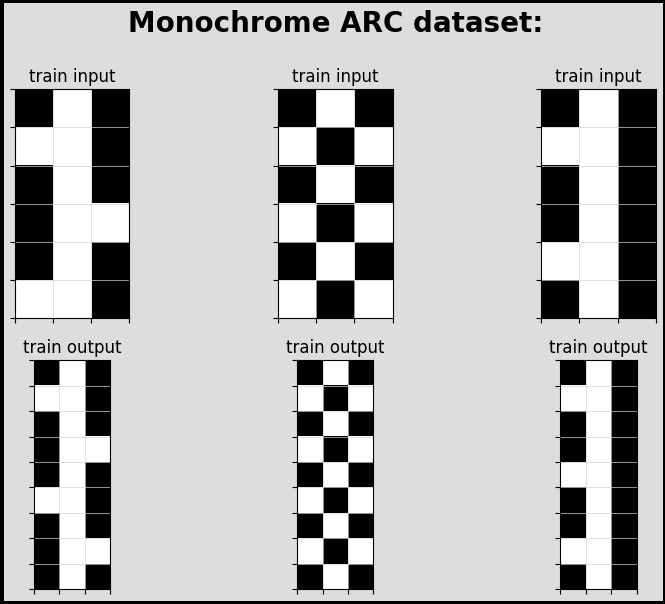

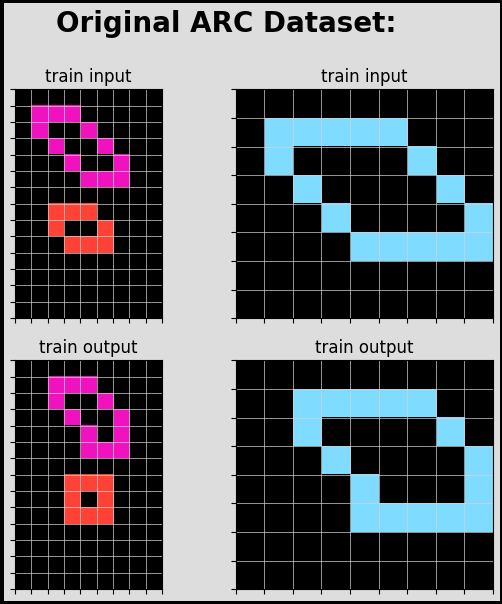

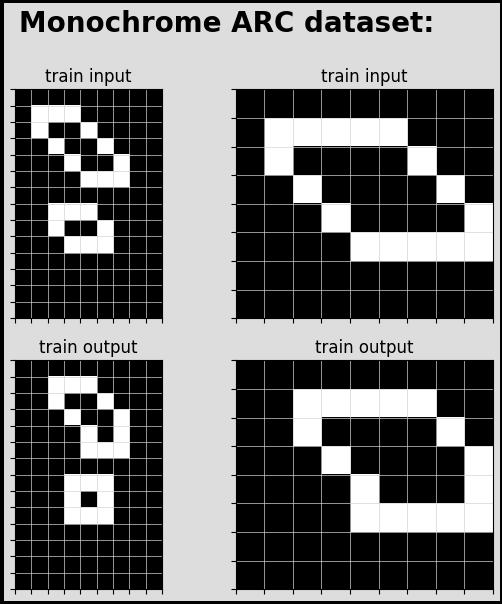

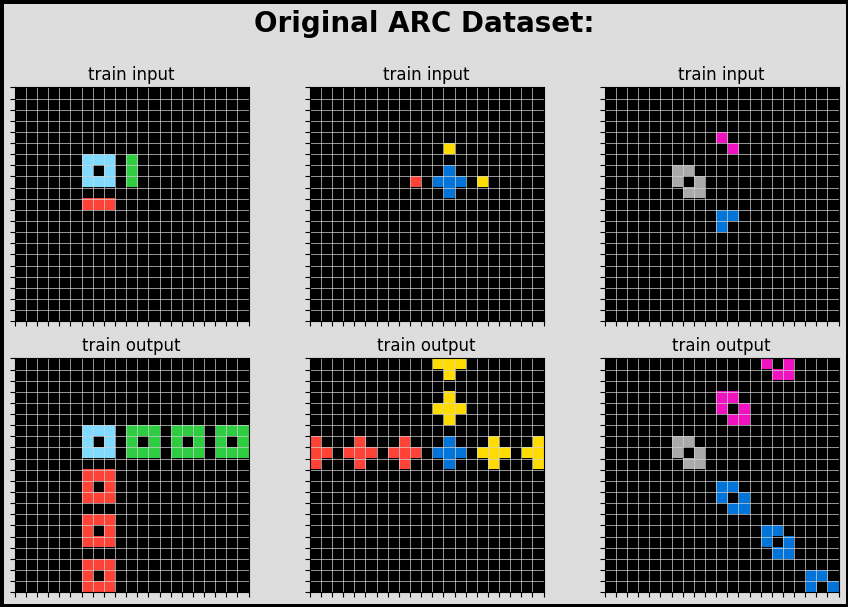

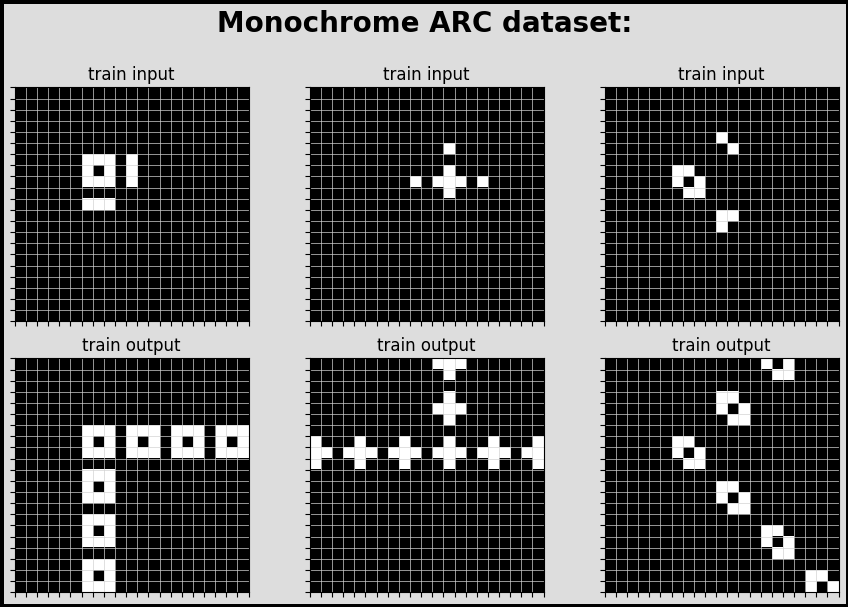

In [ ]:
for i in range(0, 5):
    t=list(training_challenges)[i]
    task=training_challenges[t]
    task_solution = training_solutions[t][0]
    plot_task(task, "Original ARC Dataset")
    plot_task(MARC[t], "Monochrome ARC dataset")
    plot_task(MARC1[t], "Original ARC Dataset - Solution")
    plot_task(MARC1[t], "Monochrome ARC Dataset Solution")
    print(); print()